In [1]:
!pip install mplfinance

In [1]:
import yfinance as yf
import mplfinance as mpf
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

2024-05-12 17:30:34.439673: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-12 17:30:34.443240: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-12 17:30:34.500016: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-12 17:30:35.624716: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
data = yf.download("TSLA", period='max', interval = '1d')
data.dropna()
data.info()

[*********************100%%**********************]  1 of 1 completed

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3491 entries, 2010-06-29 to 2024-05-10
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3491 non-null   float64
 1   High       3491 non-null   float64
 2   Low        3491 non-null   float64
 3   Close      3491 non-null   float64
 4   Adj Close  3491 non-null   float64
 5   Volume     3491 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 190.9 KB


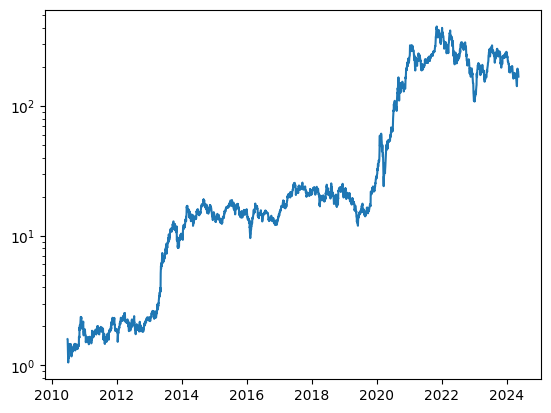

In [3]:
plt.plot(data['Adj Close'])
plt.yscale("log")
plt.show()

Shape of X_train : (1249, 10, 1)
Shape of y_train : (1249, 1)
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.1010 
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0024
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0014
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 9.5689e-04
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0010
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0010
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.9083e-04
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 8.5874e-04
Epoch 9/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0010
Epoch 10/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.4847e-04
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
RMSE: 12.225204253079085
Normalized RMSE: 0.05695841230627396


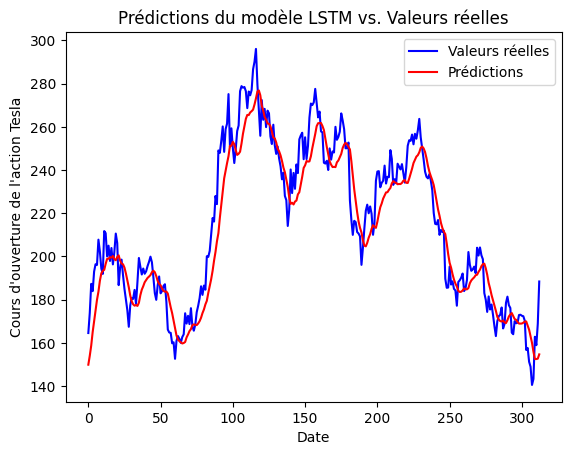

In [292]:
# Charger les données depuis le fichier CSV
dataOriginal = pd.read_csv('TSLA2.csv')['Open'].values.reshape(-1, 1)
data3 = dataOriginal.copy()

# Normaliser les données
scaler = MinMaxScaler(feature_range=(0, 1))
data_normalized = scaler.fit_transform(data3)

# Créer des séquences de données
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 10  # Longueur de la séquence
X, y = create_sequences(data_normalized, seq_length)

# Diviser les données en ensembles d'entraînement et de test
split = int(0.8 * len(X))
X_train, X_test = np.array(X[:split]), np.array(X[split:])
y_train, y_test = np.array(y[:split]), np.array(y[split:])
print("Shape of X_train :", X_train.shape)
print("Shape of y_train :", y_train.shape)


# Créer le modèle LSTM
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Entraîner le modèle
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Faire des prédictions sur l'ensemble de test
predictions = model.predict(X_test)

# Inverser la normalisation des prédictions et des valeurs réelles
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test)

# Calculer l'erreur quadratique moyenne (RMSE)
rmse = numpy.sqrt(mean_squared_error(y_test, predictions))
print(f'RMSE: {rmse}')
print(f'Normalized RMSE: {rmse / y_test.mean()}')

# Tracer les valeurs réelles et les comparer aux prédictions
plt.plot(y_test, label='Valeurs réelles', color='blue')
plt.plot(predictions, label='Prédictions', color='red')
plt.title('Prédictions du modèle LSTM vs. Valeurs réelles')
plt.xlabel('Date')
plt.ylabel('Cours d\'ouverture de l\'action Tesla')
plt.legend()
plt.show()


[*********************100%%**********************]  1 of 1 completed

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24206 entries, 1927-12-30 to 2024-05-10
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       24206 non-null  float64
 1   High       24206 non-null  float64
 2   Low        24206 non-null  float64
 3   Close      24206 non-null  float64
 4   Adj Close  24206 non-null  float64
 5   Volume     24206 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 1.3 MB
Epoch 1/10



/home/bast/.local/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


601/601 ━━━━━━━━━━━━━━━━━━━━ 56s 90ms/step - loss: 5.2079e-04
Epoch 2/10
601/601 ━━━━━━━━━━━━━━━━━━━━ 56s 93ms/step - loss: 4.3210e-06
Epoch 3/10
601/601 ━━━━━━━━━━━━━━━━━━━━ 62s 104ms/step - loss: 5.1352e-06
Epoch 4/10
601/601 ━━━━━━━━━━━━━━━━━━━━ 54s 89ms/step - loss: 4.6099e-06
Epoch 5/10
601/601 ━━━━━━━━━━━━━━━━━━━━ 59s 98ms/step - loss: 3.5803e-06
Epoch 6/10
601/601 ━━━━━━━━━━━━━━━━━━━━ 50s 83ms/step - loss: 3.6493e-06
Epoch 7/10
601/601 ━━━━━━━━━━━━━━━━━━━━ 52s 86ms/step - loss: 3.6659e-06
Epoch 8/10
601/601 ━━━━━━━━━━━━━━━━━━━━ 55s 91ms/step - loss: 3.5254e-06
Epoch 9/10
601/601 ━━━━━━━━━━━━━━━━━━━━ 47s 77ms/step - loss: 3.0098e-06
Epoch 10/10
601/601 ━━━━━━━━━━━━━━━━━━━━ 47s 78ms/step - loss: 2.9390e-06
151/151 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step
RMSE: 132.15950484656403
Normalized RMSE: 0.05849904761095501


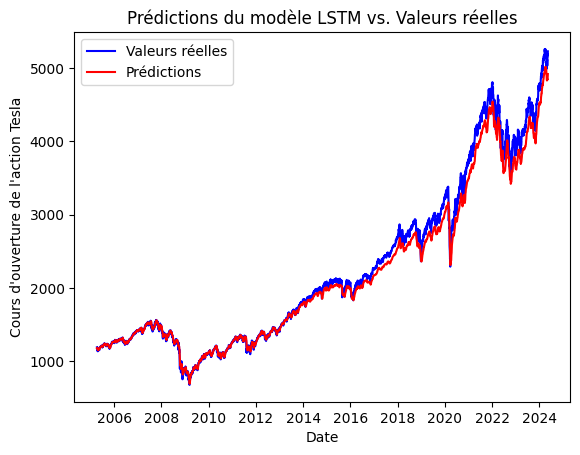

In [10]:
# Charger les données depuis le fichier CSV
data = yf.download("^GSPC", period='max', interval = '1d')
data.dropna()
data.info()

dataOriginal = data #pd.read_csv('TSLA2.csv')
dates = data.index #pd.to_datetime(dataOriginal['Date'])  # Convert the 'Date' column to datetime
open_prices = dataOriginal['Open'].values.reshape(-1, 1)

# Normaliser les données
scaler = MinMaxScaler(feature_range=(0, 1))
data_normalized = scaler.fit_transform(open_prices)

# Créer des séquences de données
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 180  # Longueur de la séquence
X, y = create_sequences(data_normalized, seq_length)

# Diviser les données en ensembles d'entraînement et de test
split = int(0.8 * len(X))
X_train, X_test = np.array(X[:split]), np.array(X[split:])
y_train, y_test = np.array(y[:split]), np.array(y[split:])

# Créer le modèle LSTM
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Entraîner le modèle
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Faire des prédictions sur l'ensemble de test
predictions = model.predict(X_test)

# Inverser la normalisation des prédictions et des valeurs réelles
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test)

# Calculer l'erreur quadratique moyenne (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f'RMSE: {rmse}')
print(f'Normalized RMSE: {rmse / y_test.mean()}')

# Tracer les valeurs réelles et les comparer aux prédictions
plt.plot(dates[split+seq_length:], y_test, label='Valeurs réelles', color='blue')
plt.plot(dates[split+seq_length:], predictions, label='Prédictions', color='red')
plt.title('Prédictions du modèle LSTM vs. Valeurs réelles')
plt.xlabel('Date')
plt.ylabel('Cours d\'ouverture de l\'action Tesla')
plt.legend()
plt.show()

In [9]:
# Load data from CSV
dataOriginal = pd.read_csv('TSLA2.csv')

# Define the list of price columns
price_columns = ['Open', 'Close', 'Low', 'High']

# Create variables for each price column using a loop
for price in price_columns:
    globals()[f'{price.lower()}_prices'] = dataOriginal[price].values.reshape(-1, 1)
    print(globals()[f'{price.lower()}_prices'])

    # Load data from CSV
dataOriginal = pd.read_csv('TSLA2.csv')

# Define the list of price columns
price_columns = ['Open', 'Close', 'Low', 'High']

# Create variables for each price column using a loop
for price in price_columns:
    globals()[f'{price.lower()}_prices'] = dataOriginal[price].values.reshape(-1, 1)
    print(globals()[f'{price.lower()}_prices'])


[[ 23.009333]
 [ 23.167334]
 [ 23.4     ]
 ...
 [158.960007]
 [168.850006]
 [188.419998]]
[[ 23.054667]
 [ 23.620667]
 [ 23.283333]
 ...
 [170.179993]
 [168.289993]
 [194.050003]]
[[ 22.811333]
 [ 23.012667]
 [ 23.242001]
 ...
 [158.360001]
 [166.369995]
 [184.539993]]
[[ 23.218   ]
 [ 23.746   ]
 [ 23.977333]
 ...
 [170.880005]
 [172.119995]
 [198.869995]]
[[ 23.009333]
 [ 23.167334]
 [ 23.4     ]
 ...
 [158.960007]
 [168.850006]
 [188.419998]]
[[ 23.054667]
 [ 23.620667]
 [ 23.283333]
 ...
 [170.179993]
 [168.289993]
 [194.050003]]
[[ 22.811333]
 [ 23.012667]
 [ 23.242001]
 ...
 [158.360001]
 [166.369995]
 [184.539993]]
[[ 23.218   ]
 [ 23.746   ]
 [ 23.977333]
 ...
 [170.880005]
 [172.119995]
 [198.869995]]


In [8]:
actual_df =  pd.DataFrame()
actual_df.set_index(dates[0+10:])

ValueError: Length mismatch: Expected 0 rows, received array of length 24196

[*********************100%%**********************]  1 of 1 completed

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 756 entries, 2021-05-11 to 2024-05-10
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       756 non-null    float64
 1   High       756 non-null    float64
 2   Low        756 non-null    float64
 3   Close      756 non-null    float64
 4   Adj Close  756 non-null    float64
 5   Volume     756 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 41.3 KB
Epoch 1/10



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.2243
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0778
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0102
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0058
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0040
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0031
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0032
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0033
Epoch 9/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0031
Epoch 10/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0029
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
RMSE: 11.038410389497049
Normalized RMSE: 0.053442107811836004


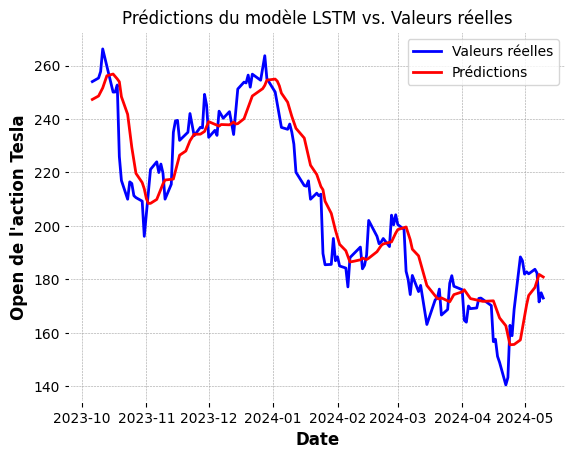

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2534
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0708
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0098
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0056
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0042
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0036
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0042
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0034
Epoch 9/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0035
Epoch 10/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0034
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step
RMSE: 11.660119329565987
Normalized RMSE: 0.056531152761773236


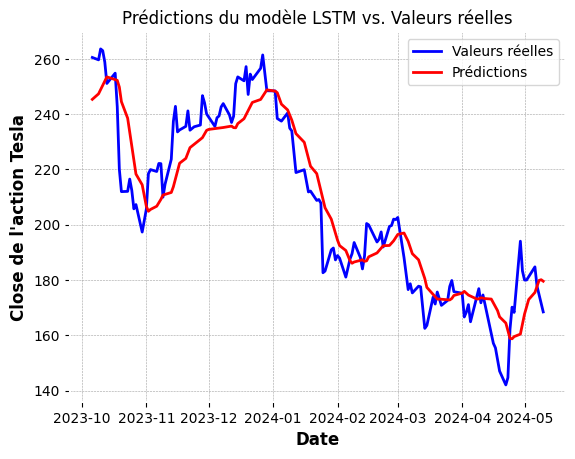

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.2198
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0563
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0118
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0068
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0051
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0047
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0039
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0039
Epoch 9/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0038
Epoch 10/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0039
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
RMSE: 13.381482171373985
Normalized RMSE: 0.0661125183874095


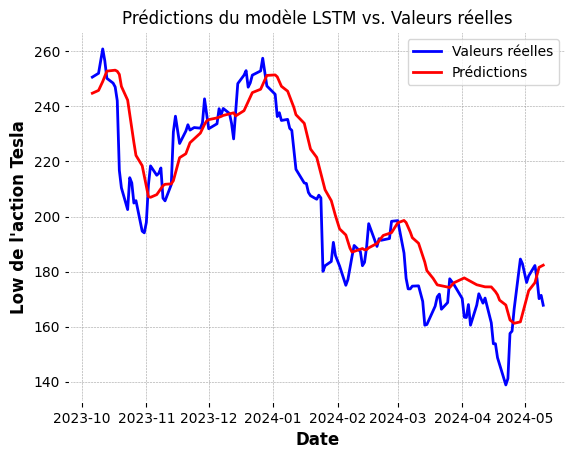

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.1371
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0244
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0046
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0031
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0026
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0028
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0024
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0025
Epoch 9/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0021
Epoch 10/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0022
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step
RMSE: 9.276860104885268
Normalized RMSE: 0.04411941562065841


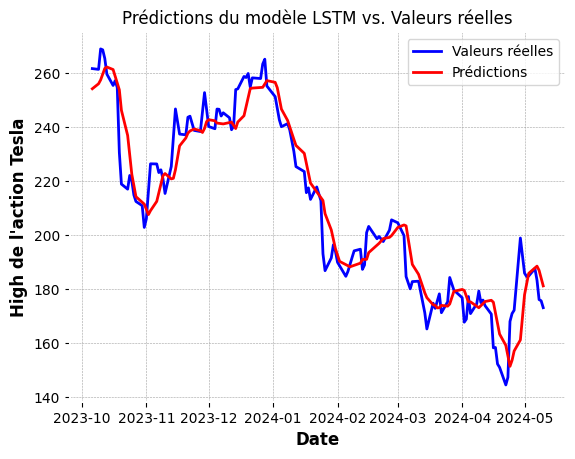

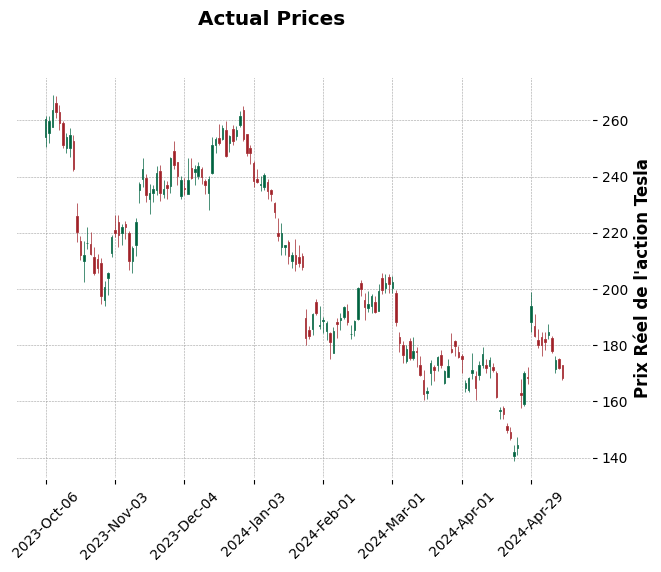

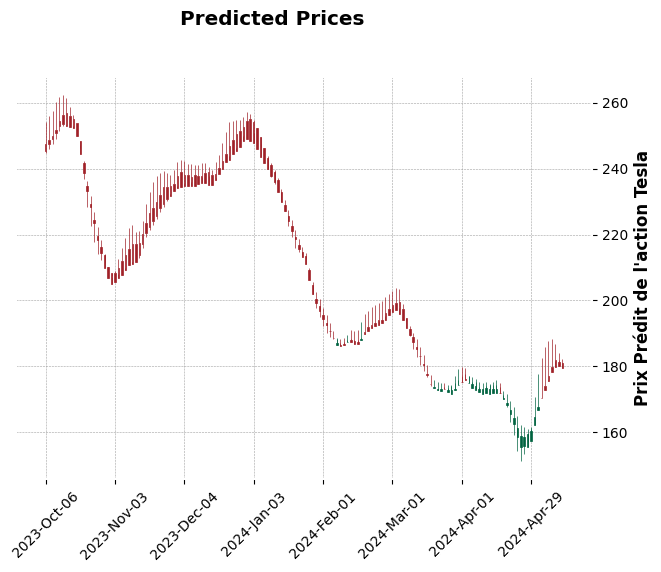

In [341]:
# Charger les données depuis le fichier CSV
data = yf.download("TSLA", period='max', interval = '1d')
data.dropna()
data.info()

dataOriginal = data #pd.read_csv('TSLA2.csv')
dates = data.index #pd.to_datetime(dataOriginal['Date'])  # Convert the 'Date' column to datetime

actual_df = pd.DataFrame(index=dates[split+seq_length:])
predictions_df = pd.DataFrame(index=dates[split+seq_length:])

# Define the list of price columns
price_columns = ['Open', 'Close', 'Low', 'High']

# Create variables for each price column using a loop
for price in price_columns:

  globals()[f'{price.lower()}_prices'] = dataOriginal[price].values.reshape(-1, 1)

  # Normaliser les données
  scaler = MinMaxScaler(feature_range=(0, 1))
  data_normalized = scaler.fit_transform(globals()[f'{price.lower()}_prices'])

  # Créer des séquences de données
  def create_sequences(data, seq_length):
      X, y = [], []
      for i in range(len(data) - seq_length):
          X.append(data[i:i + seq_length])
          y.append(data[i + seq_length])
      return np.array(X), np.array(y)

  seq_length = 10  # Longueur de la séquence
  X, y = create_sequences(data_normalized, seq_length)

  # Diviser les données en ensembles d'entraînement et de test
  split = int(0.8 * len(X))
  X_train, X_test = np.array(X[:split]), np.array(X[split:])
  y_train, y_test = np.array(y[:split]), np.array(y[split:])

  # Créer le modèle LSTM
  model = Sequential()
  model.add(LSTM(50, activation='relu', input_shape=(seq_length, 1)))
  model.add(Dense(1))
  model.compile(optimizer='adam', loss='mse')

  # Entraîner le modèle
  model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

  # Faire des prédictions sur l'ensemble de test
  predictions = model.predict(X_test)

  # Inverser la normalisation des prédictions et des valeurs réelles
  predictions = scaler.inverse_transform(predictions)
  y_test = scaler.inverse_transform(y_test)

  # Calculer l'erreur quadratique moyenne (RMSE)
  rmse = np.sqrt(mean_squared_error(y_test, predictions))
  print(f'RMSE: {rmse}')
  print(f'Normalized RMSE: {rmse / y_test.mean()}')

  # Tracer les valeurs réelles et les comparer aux prédictions
  plt.plot(dates[split+seq_length:], y_test, label='Valeurs réelles', color='blue')
  plt.plot(dates[split+seq_length:], predictions, label='Prédictions', color='red')
  plt.title('Prédictions du modèle LSTM vs. Valeurs réelles')
  plt.xlabel('Date')
  plt.ylabel(f'{price} de l\'action Tesla')
  plt.legend()
  plt.show()

  # Adding Values to DataFrame
  actual_df[price] = y_test
  predictions_df[price] = predictions

# Plot actual prices and predictions using mplfinance
mpf.plot(actual_df, type='candle', style='charles', ylabel='Prix Réel de l\'action Tesla', title='Actual Prices')
mpf.plot(predictions_df, type='candle', style='charles', ylabel='Prix Prédit de l\'action Tesla', title='Predicted Prices')

[*********************100%%**********************]  1 of 1 completed


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8655 entries, 1990-01-02 to 2024-05-09
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       8655 non-null   float64
 1   High       8655 non-null   float64
 2   Low        8655 non-null   float64
 3   Close      8655 non-null   float64
 4   Adj Close  8655 non-null   float64
 5   Volume     8655 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 473.3 KB
Epoch 1/10
163/163 [==============================] - 3s 8ms/step - loss: 0.0374 - val_loss: 0.0535
Epoch 2/10
163/163 [==============================] - 1s 6ms/step - loss: 0.0136 - val_loss: 0.0216
Epoch 3/10
163/163 [==============================] - 1s 6ms/step - loss: 0.0052 - val_loss: 0.0055
Epoch 4/10
163/163 [==============================] - 1s 6ms/step - loss: 8.7065e-04 - val_loss: 2.4233e-04
Epoch 5/10
163/163 [==============================] - 1s 7ms/step - loss: 5.4635e-05 - val_loss:

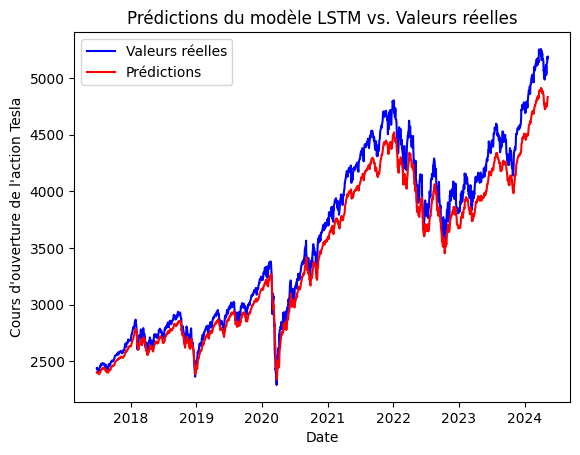

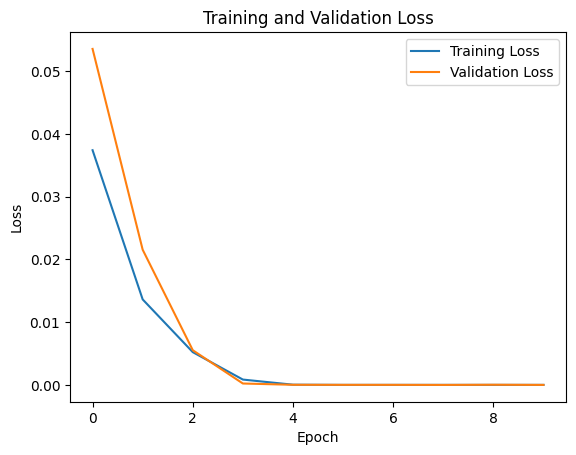

In [52]:
# Date for train, validation en test
start_date = "1990-01-01"
end_date = "2024-05-10"

# Parameters for fitting
epochs=10
batch_size=32
verbose=1

# Log price
is_log = True
base = 2
def log_base(x, base):
    return np.log(x) / np.log(base)

# Charger les données depuis le fichier CSV
data = yf.download("^GSPC", start =start_date, end =end_date, interval = '1d')
# data = yf.download("TSLA", period='max', interval = '1d')
data.dropna()

if (is_log) :
  data['Open'] = log_base(data['Open'], base)
  data['Close'] = log_base(data['Close'], base)
  data['Low'] = log_base(data['Low'], base)
  data['High'] = log_base(data['High'], base)
data.info()

dataOriginal = data
dates = data.index
open_prices = dataOriginal['Open'].values.reshape(-1, 1)

# Normaliser les données
scaler = MinMaxScaler(feature_range=(0, 1))
data_normalized = scaler.fit_transform(open_prices)

# Créer des séquences de données
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 10 # Longueur de la séquence
X, y = create_sequences(data_normalized, seq_length)

# Diviser les données en ensembles d'entraînement, de validation et de test
split_train = int(0.6 * len(X))  # 60% pour l'entraînement
split_val = int(0.2 * len(X)) + split_train  # 20% pour la validation
X_train, X_val, X_test = np.array(X[:split_train]), np.array(X[split_train:split_val]), np.array(X[split_val:])
y_train, y_val, y_test = np.array(y[:split_train]), np.array(y[split_train:split_val]), np.array(y[split_val:])

# Créer le modèle LSTM
model = Sequential()
model.add(LSTM(50, activation='sigmoid', input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Entraîner le modèle avec validation
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=verbose, validation_data=(X_val, y_val))

# Faire des prédictions sur l'ensemble de test
predictions_test = model.predict(X_test)

# Inverser la normalisation des prédictions et des valeurs réelles
predictions_test = scaler.inverse_transform(predictions_test)
y_test = scaler.inverse_transform(y_test)

# Calculer l'erreur quadratique moyenne (RMSE)
rmse_test = np.sqrt(mean_squared_error(y_test, predictions_test))
print(f'RMSE: {rmse_test}')
print(f'Normalized RMSE: {rmse_test / y_test.mean()}')

# Tracer les valeurs réelles et les comparer aux prédictions
if (is_log):
  plt.plot(dates[split_val+seq_length:], np.power(base, y_test), label='Valeurs réelles', color='blue')
  plt.plot(dates[split_val+seq_length:], np.power(base, predictions_test), label='Prédictions', color='red')
else :
  plt.plot(dates[split_val+seq_length:], y_test, label='Valeurs réelles', color='blue')
  plt.plot(dates[split_val+seq_length:], predictions_test, label='Prédictions', color='red')
plt.title('Prédictions du modèle LSTM vs. Valeurs réelles')
plt.xlabel('Date')
plt.ylabel('Cours d\'ouverture de l\'action Tesla')
# plt.yscale("log")
plt.legend()
plt.show()

# Tracer la perte d'entraînement et de validation au fil des époques
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
# plt.yscale("log")
plt.legend()
plt.show()


[*********************100%%**********************]  1 of 1 completed


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3491 entries, 2010-06-29 to 2024-05-10
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3491 non-null   float64
 1   High       3491 non-null   float64
 2   Low        3491 non-null   float64
 3   Close      3491 non-null   float64
 4   Adj Close  3491 non-null   float64
 5   Volume     3491 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 190.9 KB
Epoch 1/10
63/63 [==============================] - 7s 88ms/step - loss: 0.0504 - val_loss: 0.1379
Epoch 2/10
63/63 [==============================] - 4s 64ms/step - loss: 0.0204 - val_loss: 0.1082
Epoch 3/10
63/63 [==============================] - 4s 62ms/step - loss: 0.0166 - val_loss: 0.0835
Epoch 4/10
63/63 [==============================] - 5s 75ms/step - loss: 0.0126 - val_loss: 0.0509
Epoch 5/10
63/63 [==============================] - 5s 74ms/step - loss: 0.0091 - val_loss: 0.0408
Epoch 6/1

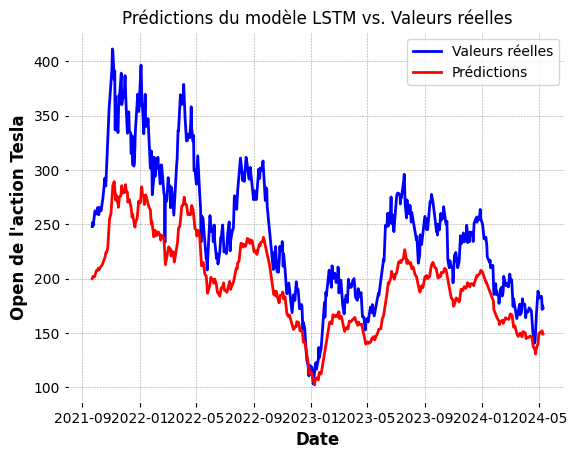

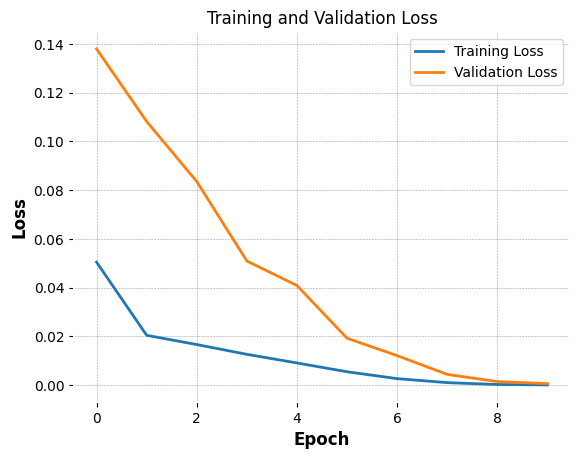

Epoch 1/10
63/63 [==============================] - 7s 68ms/step - loss: 0.0293 - val_loss: 0.1330
Epoch 2/10
63/63 [==============================] - 4s 71ms/step - loss: 0.0196 - val_loss: 0.0744
Epoch 3/10
63/63 [==============================] - 5s 81ms/step - loss: 0.0132 - val_loss: 0.0564
Epoch 4/10
63/63 [==============================] - 4s 68ms/step - loss: 0.0074 - val_loss: 0.0303
Epoch 5/10
63/63 [==============================] - 5s 74ms/step - loss: 0.0024 - val_loss: 0.0043
Epoch 6/10
63/63 [==============================] - 5s 75ms/step - loss: 2.7639e-04 - val_loss: 8.5893e-04
Epoch 7/10
63/63 [==============================] - 4s 64ms/step - loss: 7.4092e-05 - val_loss: 6.0399e-04
Epoch 8/10
63/63 [==============================] - 5s 75ms/step - loss: 5.8077e-05 - val_loss: 4.0209e-04
Epoch 9/10
63/63 [==============================] - 5s 80ms/step - loss: 6.1192e-05 - val_loss: 5.6048e-04
Epoch 10/10
21/21 [==============================] - 1s 21ms/step
RMSE: 0.257

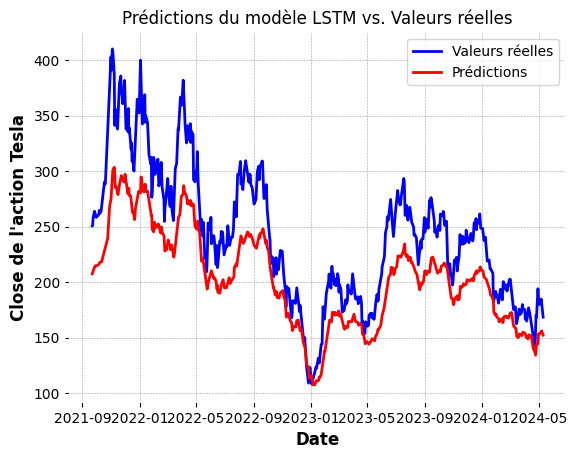

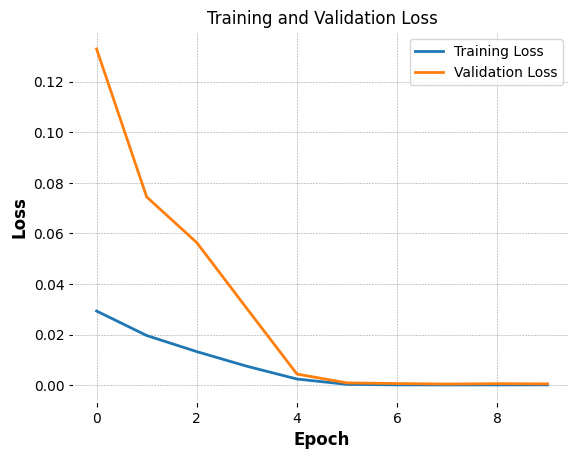

Epoch 1/10
63/63 [==============================] - 7s 93ms/step - loss: 0.0259 - val_loss: 0.1152
Epoch 2/10
63/63 [==============================] - 4s 65ms/step - loss: 0.0178 - val_loss: 0.0816
Epoch 3/10
63/63 [==============================] - 4s 65ms/step - loss: 0.0122 - val_loss: 0.0352
Epoch 4/10
63/63 [==============================] - 6s 91ms/step - loss: 0.0067 - val_loss: 0.0256
Epoch 5/10
63/63 [==============================] - 4s 66ms/step - loss: 0.0021 - val_loss: 0.0032
Epoch 6/10
63/63 [==============================] - 4s 65ms/step - loss: 2.4237e-04 - val_loss: 2.6764e-04
Epoch 7/10
63/63 [==============================] - 6s 92ms/step - loss: 6.3796e-05 - val_loss: 6.4385e-04
Epoch 8/10
63/63 [==============================] - 4s 65ms/step - loss: 8.0924e-05 - val_loss: 3.4828e-04
Epoch 9/10
63/63 [==============================] - 4s 66ms/step - loss: 6.8932e-05 - val_loss: 1.7444e-04
Epoch 10/10
21/21 [==============================] - 1s 21ms/step
RMSE: 0.155

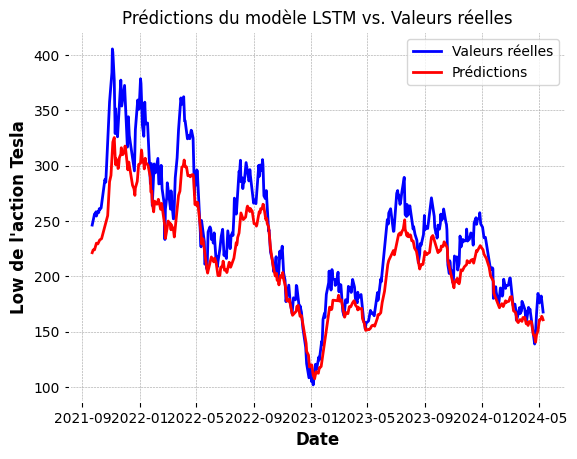

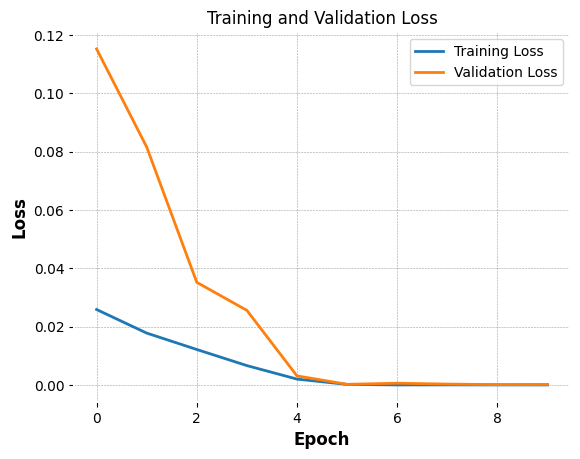

Epoch 1/10
63/63 [==============================] - 6s 72ms/step - loss: 0.0303 - val_loss: 0.0999
Epoch 2/10
63/63 [==============================] - 6s 91ms/step - loss: 0.0185 - val_loss: 0.0756
Epoch 3/10
63/63 [==============================] - 4s 70ms/step - loss: 0.0138 - val_loss: 0.0635
Epoch 4/10
63/63 [==============================] - 4s 65ms/step - loss: 0.0088 - val_loss: 0.0307
Epoch 5/10
63/63 [==============================] - 6s 92ms/step - loss: 0.0040 - val_loss: 0.0165
Epoch 6/10
63/63 [==============================] - 4s 66ms/step - loss: 9.5333e-04 - val_loss: 0.0018
Epoch 7/10
63/63 [==============================] - 4s 66ms/step - loss: 9.8749e-05 - val_loss: 7.3521e-04
Epoch 8/10
63/63 [==============================] - 6s 92ms/step - loss: 5.7236e-05 - val_loss: 7.4885e-04
Epoch 9/10
63/63 [==============================] - 4s 66ms/step - loss: 5.8054e-05 - val_loss: 5.1768e-04
Epoch 10/10
21/21 [==============================] - 1s 21ms/step
RMSE: 0.2556552

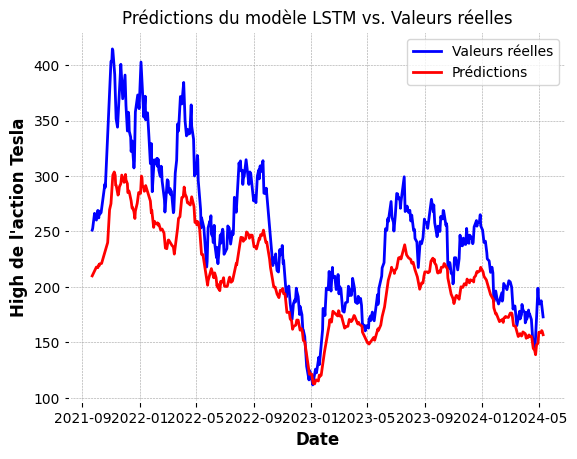

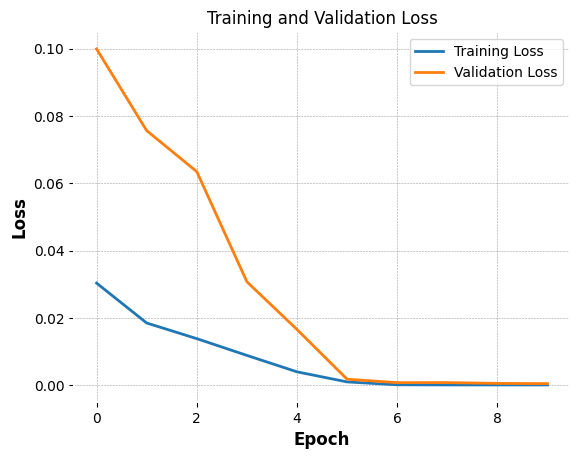

/usr/local/lib/python3.10/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


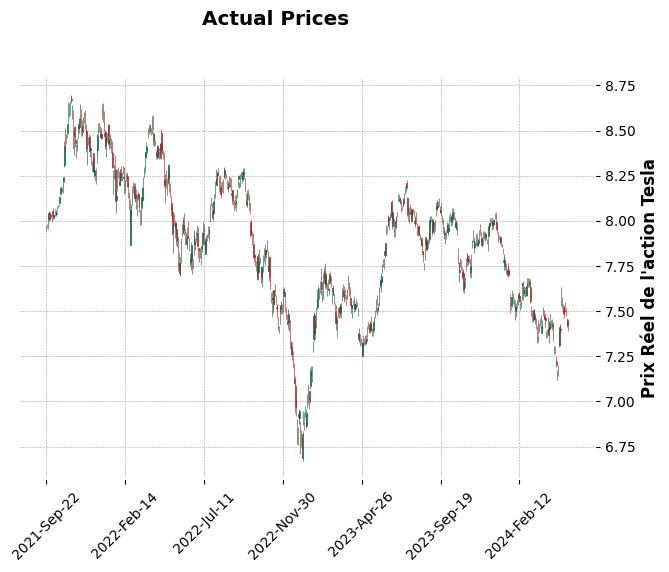

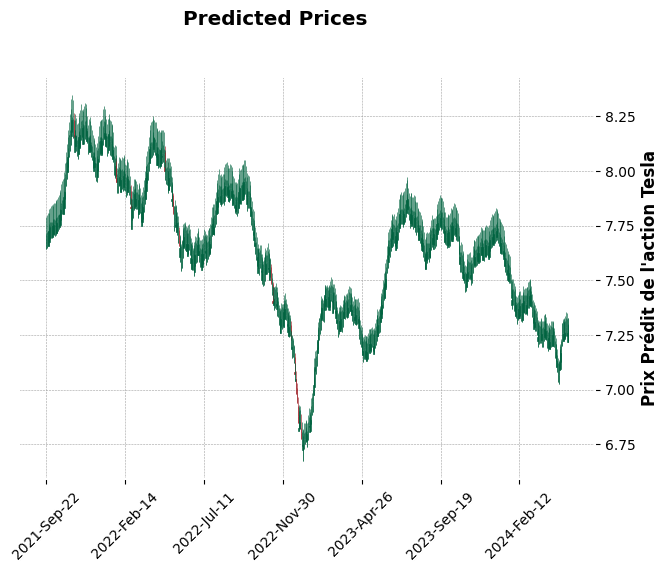

In [79]:
# Date for train, validation en test
start_date = "1990-01-01"
end_date = "2024-05-10"

# Parameters for fitting
epochs=10
batch_size=32
verbose=1

# Log price
is_log = True
base = 2
def log_base(x, base):
    return np.log(x) / np.log(base)

# data = yf.download("^GSPC", start =start_date, end =end_date, interval = '1d')
data = yf.download("TSLA", period='max', interval = '1d')
data.dropna()

if (is_log) :
  data['Open'] = log_base(data['Open'], base)
  data['Close'] = log_base(data['Close'], base)
  data['Low'] = log_base(data['Low'], base)
  data['High'] = log_base(data['High'], base)
data.info()

dataOriginal = data
dates = data.index

actual_df = pd.DataFrame(index=dates[split_val+seq_length:])
predictions_df = pd.DataFrame(index=dates[split_val+seq_length:])

# Define the list of price columns
price_columns = ['Open', 'Close', 'Low', 'High']

# Create variables for each price column using a loop
for price in price_columns:

  globals()[f'{price.lower()}_prices'] = data[price].values.reshape(-1, 1)

  # Normaliser les données
  scaler = MinMaxScaler(feature_range=(0, 1))
  data_normalized = scaler.fit_transform(globals()[f'{price.lower()}_prices'])

  # Créer des séquences de données
  def create_sequences(data, seq_length):
      X, y = [], []
      for i in range(len(data) - seq_length):
          X.append(data[i:i + seq_length])
          y.append(data[i + seq_length])
      return np.array(X), np.array(y)

  seq_length = 180  # Longueur de la séquence
  X, y = create_sequences(data_normalized, seq_length)

  # Diviser les données en ensembles d'entraînement et de test
  split_train = int(0.6 * len(X))  # 60% pour l'entraînement
  split_val = int(0.2 * len(X)) + split_train  # 20% pour la validation
  X_train, X_val, X_test = np.array(X[:split_train]), np.array(X[split_train:split_val]), np.array(X[split_val:])
  y_train, y_val, y_test = np.array(y[:split_train]), np.array(y[split_train:split_val]), np.array(y[split_val:])

  # Créer le modèle LSTM
  model = Sequential()
  model.add(LSTM(50, activation='sigmoid', input_shape=(seq_length, 1)))
  model.add(Dense(1))
  model.compile(optimizer='adam', loss='mse')

  # Entraîner le modèle
  history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=verbose, validation_data=(X_val, y_val))

  # Faire des prédictions sur l'ensemble de test
  predictions_test = model.predict(X_test)

  # Inverser la normalisation des prédictions et des valeurs réelles
  predictions_test = scaler.inverse_transform(predictions_test)
  y_test = scaler.inverse_transform(y_test)

  # Calculer l'erreur quadratique moyenne (RMSE)
  rmse = np.sqrt(mean_squared_error(y_test, predictions_test))
  print(f'RMSE: {rmse}')
  print(f'Normalized RMSE: {rmse / y_test.mean()}')

  # Tracer les valeurs réelles et les comparer aux prédictions
  if (is_log):
    plt.plot(dates[split_val+seq_length:], np.power(base, y_test), label='Valeurs réelles', color='blue')
    plt.plot(dates[split_val+seq_length:], np.power(base, predictions_test), label='Prédictions', color='red')
  else :
    plt.plot(dates[split_val+seq_length:], y_test, label='Valeurs réelles', color='blue')
    plt.plot(dates[split_val+seq_length:], predictions_test, label='Prédictions', color='red')
  plt.title('Prédictions du modèle LSTM vs. Valeurs réelles')
  plt.xlabel('Date')
  plt.ylabel(f'{price} de l\'action Tesla')
  # plt.yscale("log")
  plt.legend()
  plt.show()

  # Tracer la perte d'entraînement et de validation au fil des époques
  plt.plot(history.history['loss'], label='Training Loss')
  plt.plot(history.history['val_loss'], label='Validation Loss')
  plt.title('Training and Validation Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  # plt.yscale("log")
  plt.legend()
  plt.show()

  # Adding Values to DataFrame
  # if (is_log):
  #   actual_df[price] = np.power(base, y_test)
  #   predictions_df[price] = np.power(base, predictions_test)
  # else :
  actual_df[price] = y_test
  predictions_df[price] = predictions_test

# Plot actual prices and predictions using mplfinance
mpf.plot(actual_df, type='candle', style='charles', ylabel='Prix Réel de l\'action Tesla', title='Actual Prices')
mpf.plot(predictions_df, type='candle', style='charles', ylabel='Prix Prédit de l\'action Tesla', title='Predicted Prices', warn_too_much_data=7000)

